In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Data preprocessing
#1.drop missing values
#2.handle inconsistencies
#3. handle/fill the missing values
#4. handle/drop outliers
#5. drop the duplicates


In [5]:
# inconsistency

In [4]:
df=pd.read_csv('data1.csv')
df

,Unnamed: 0,Name,Volume,Value,text
0,0,May21,23s,21321,This is ni89ce
1,1,James,12,12311,Its pretty!
2,2,Adi22,11,4435,Its pretty
3,3,ADI,34,32454,Its Pretty
4,4,Girl90,56,654654,this is nice


In [5]:
df.nunique()

Unnamed: 0    5
Name          5
Volume        5
Value         5
text          5
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Name', 'Volume', 'Value', 'text'], dtype='object')

In [7]:
# lowering the cases in column names
df.columns=df.columns.str.lower()
df

,unnamed: 0,name,volume,value,text
0,0,May21,23s,21321,This is ni89ce
1,1,James,12,12311,Its pretty!
2,2,Adi22,11,4435,Its pretty
3,3,ADI,34,32454,Its Pretty
4,4,Girl90,56,654654,this is nice


In [8]:
# lowering the cases in the dataset
df=df.applymap(lambda x:x.lower() if type(x)==str else x)
df

,unnamed: 0,name,volume,value,text
0,0,may21,23s,21321,this is ni89ce
1,1,james,12,12311,its pretty!
2,2,adi22,11,4435,its pretty
3,3,adi,34,32454,its pretty
4,4,girl90,56,654654,this is nice


In [9]:
# removing special characters
df['text']=df['text'].str.replace('[!,@,]','')
df

,unnamed: 0,name,volume,value,text
0,0,may21,23s,21321,this is ni89ce
1,1,james,12,12311,its pretty
2,2,adi22,11,4435,its pretty
3,3,adi,34,32454,its pretty
4,4,girl90,56,654654,this is nice


In [10]:
# removing numbers in strings
df['name']=df['name'].str.replace('\d+','')
df

,unnamed: 0,name,volume,value,text
0,0,may,23s,21321,this is ni89ce
1,1,james,12,12311,its pretty
2,2,adi,11,4435,its pretty
3,3,adi,34,32454,its pretty
4,4,girl,56,654654,this is nice


In [11]:
# removing munbers in strings
df['text']=df['text'].str.replace('\d+','')
df

,unnamed: 0,name,volume,value,text
0,0,may,23s,21321,this is nice
1,1,james,12,12311,its pretty
2,2,adi,11,4435,its pretty
3,3,adi,34,32454,its pretty
4,4,girl,56,654654,this is nice


In [12]:
# removing strings in numerical values
df['volume']=df['volume'].str.replace('r\d','')
df

,unnamed: 0,name,volume,value,text
0,0,may,23s,21321,this is nice
1,1,james,12,12311,its pretty
2,2,adi,11,4435,its pretty
3,3,adi,34,32454,its pretty
4,4,girl,56,654654,this is nice


In [13]:
df.nunique()

unnamed: 0    5
name          4
volume        5
value         5
text          2
dtype: int64

In [16]:
mod=pd.read_json('modcloth_final_data.json',lines=True)
mod.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [17]:
mod.nunique()

item_id            1378
waist                31
size                 29
quality               5
cup size             12
hips                 31
bra size             11
category              7
bust                 40
height               41
user_name         32429
length                5
fit                   3
user_id           47958
shoe size            15
shoe width            3
review_summary    61713
review_text       73313
dtype: int64

In [18]:
mod.isna().mean().sort_values(ascending=False)*100

waist             96.518903
bust              85.681846
shoe width        77.525063
shoe size         66.282160
hips              32.281677
review_text        8.122962
review_summary     8.122962
cup size           7.555260
bra size           7.268994
height             1.337118
quality            0.082136
length             0.042276
user_name          0.000000
fit                0.000000
user_id            0.000000
category           0.000000
size               0.000000
item_id            0.000000
dtype: float64

In [19]:
# retain columns having missing values <0.5
mod=mod.loc[:,mod.isna().mean()<0.5]
mod.columns

Index(['item_id', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'height', 'user_name', 'length', 'fit', 'user_id',
       'review_summary', 'review_text'],
      dtype='object')

In [20]:
# handle the inconsistencies

In [21]:
mod.dtypes

item_id             int64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
height             object
user_name          object
length             object
fit                object
user_id             int64
review_summary     object
review_text        object
dtype: object

In [22]:
mod.nunique()

item_id            1378
size                 29
quality               5
cup size             12
hips                 31
bra size             11
category              7
height               41
user_name         32429
length                5
fit                   3
user_id           47958
review_summary    61713
review_text       73313
dtype: int64

In [23]:
mod.quality.value_counts()

5.0    29604
4.0    27118
3.0    19526
2.0     5130
1.0     1344
Name: quality, dtype: int64

In [24]:
mod.category.value_counts()

new          21488
tops         20364
dresses      18650
bottoms      15266
outerwear     4223
sale          2524
wedding        275
Name: category, dtype: int64

In [25]:
mod.length.value_counts()

just right        61944
slightly long     11261
slightly short     6319
very long          2428
very short          803
Name: length, dtype: int64

In [26]:
mod.review_summary.value_counts()

Love it!                     185
I absolutely love this dr    124
Love it                       92
I really wanted to love t     92
I love this dress so much     84
                            ... 
Love it! Have it in two c      1
I would size up. A little      1
Wish it didn't pill under      1
Love this!! Such a great       1
I love this piece. I'm re      1
Name: review_summary, Length: 61713, dtype: int64

In [27]:
mod.review_text.value_counts()

Love it!                                                                                                                                                                                                                                                   153
Love it                                                                                                                                                                                                                                                     81
.                                                                                                                                                                                                                                                           76
Perfect!                                                                                                                                                                                                                                   

In [28]:
mod.nunique()

item_id            1378
size                 29
quality               5
cup size             12
hips                 31
bra size             11
category              7
height               41
user_name         32429
length                5
fit                   3
user_id           47958
review_summary    61713
review_text       73313
dtype: int64

In [29]:
mod.columns=mod.columns.str.replace(' ','_')
mod.columns

Index(['item_id', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'height', 'user_name', 'length', 'fit', 'user_id',
       'review_summary', 'review_text'],
      dtype='object')

In [30]:
# lower the cases
mod=mod.applymap(lambda f:f.lower() if type(f)==str else f)
mod

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,5ft 6in,emily,just right,small,991571,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN
2,123373,7,2.0,b,NaN,32.0,new,5ft 7in,ugggh,slightly long,small,395665,NaN,NaN
3,123373,21,5.0,dd/e,NaN,NaN,new,NaN,alexmeyer626,just right,fit,875643,NaN,NaN
4,123373,18,5.0,b,NaN,36.0,new,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,NaN,36.0,outerwear,5ft 8in,jennifer,just right,fit,727820,cute jacket!,cute jacket!
82786,807722,12,5.0,ddd/f,NaN,34.0,outerwear,5ft 5in,kelli,slightly long,small,197040,it's a beautiful jacket.,it's a beautiful jacket. i love how it's knit ...
82787,807722,12,5.0,dddd/g,36.0,32.0,outerwear,5ft 4in,elacount,just right,fit,102493,i love this blazer. it is,i love this blazer. it is a great office piece...
82788,807722,12,4.0,NaN,NaN,NaN,outerwear,5ft 3in,jennaklinner,just right,fit,756491,i love this blazer!! i wo,i love this blazer!! i wore it yesterday and g...


In [31]:
# remove special characters
mod['review_summary']=mod['review_summary'].str.replace('[!,@,&,$]','')
mod['review_text']=mod['review_text'].str.replace('[!,@,&,$]','')
mod
                                                         
                                                         
                                                         

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,5ft 6in,emily,just right,small,991571,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN
2,123373,7,2.0,b,NaN,32.0,new,5ft 7in,ugggh,slightly long,small,395665,NaN,NaN
3,123373,21,5.0,dd/e,NaN,NaN,new,NaN,alexmeyer626,just right,fit,875643,NaN,NaN
4,123373,18,5.0,b,NaN,36.0,new,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,NaN,36.0,outerwear,5ft 8in,jennifer,just right,fit,727820,cute jacket,cute jacket
82786,807722,12,5.0,ddd/f,NaN,34.0,outerwear,5ft 5in,kelli,slightly long,small,197040,it's a beautiful jacket.,it's a beautiful jacket. i love how it's knit ...
82787,807722,12,5.0,dddd/g,36.0,32.0,outerwear,5ft 4in,elacount,just right,fit,102493,i love this blazer. it is,i love this blazer. it is a great office piece...
82788,807722,12,4.0,NaN,NaN,NaN,outerwear,5ft 3in,jennaklinner,just right,fit,756491,i love this blazer i wo,i love this blazer i wore it yesterday and got...


In [32]:
mod.nunique()

item_id            1378
size                 29
quality               5
cup_size             12
hips                 31
bra_size             11
category              7
height               41
user_name         31975
length                5
fit                   3
user_id           47958
review_summary    59260
review_text       72756
dtype: int64

# missing values

# 1. drop columns having >50%
# 2. use mode(categorical data,numerical data and when data is skewed) and median(numerical data only) to impute/fill the missing values
# 3. impute using interpolation( continuous data and time-series data)

# handling outliers/noisy date
# 1. identified by plotting box plot, violin plot or distribution plot 
# 2. use z score method to identify and remove outliers
# if z score is greater than 3 there is an outlier


# handling the missing values

In [33]:
mod=pd.read_json('modcloth_final_data.json',lines=True)
mod.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [34]:
mod.nunique()

item_id            1378
waist                31
size                 29
quality               5
cup size             12
hips                 31
bra size             11
category              7
bust                 40
height               41
user_name         32429
length                5
fit                   3
user_id           47958
shoe size            15
shoe width            3
review_summary    61713
review_text       73313
dtype: int64

In [35]:
mod.dtypes

item_id             int64
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

In [36]:
mod.isna().sum()

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [37]:
mod.isna().mean().sort_values(ascending=False)*100

waist             96.518903
bust              85.681846
shoe width        77.525063
shoe size         66.282160
hips              32.281677
review_text        8.122962
review_summary     8.122962
cup size           7.555260
bra size           7.268994
height             1.337118
quality            0.082136
length             0.042276
user_name          0.000000
fit                0.000000
user_id            0.000000
category           0.000000
size               0.000000
item_id            0.000000
dtype: float64

In [38]:
# retain columns having missing values <0.5
mod=mod.loc[:,mod.isna().mean()<0.5]
mod.columns

Index(['item_id', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'height', 'user_name', 'length', 'fit', 'user_id',
       'review_summary', 'review_text'],
      dtype='object')

In [39]:
mod.head(4)

,item_id,size,quality,cup size,hips,bra size,category,height,user_name,length,fit,user_id,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,5ft 6in,Emily,just right,small,991571,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN
2,123373,7,2.0,b,NaN,32.0,new,5ft 7in,Ugggh,slightly long,small,395665,NaN,NaN
3,123373,21,5.0,dd/e,NaN,NaN,new,NaN,alexmeyer626,just right,fit,875643,NaN,NaN


In [40]:
mod=mod.drop(['item_id','user_name','user_id'],1)
mod.columns

Index(['size', 'quality', 'cup size', 'hips', 'bra size', 'category', 'height',
       'length', 'fit', 'review_summary', 'review_text'],
      dtype='object')

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
mod.isna().sum()

size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
height             1107
length               35
fit                   0
review_summary     6725
review_text        6725
dtype: int64

In [43]:
# select object columns-USE MODE IN ALL OBJECTS
obj=mod.select_dtypes(include='O')
obj.columns

Index(['cup size', 'category', 'height', 'length', 'fit', 'review_summary',
       'review_text'],
      dtype='object')

In [44]:
# imputting missing values using mode

In [45]:
mod['cup size']=mod['cup size'].fillna(mod['cup size'].mode()[0])

In [46]:
mod['cup size'].mode()

0    c
Name: cup size, dtype: object

In [47]:
mod['cup size'].isna().sum()

0

In [48]:
oc=['height', 'length', 'review_summary', 'review_text']

In [49]:
mod[oc]=mod[oc].fillna(mod[oc].mode().iloc[0])

In [50]:
mod.isna().sum()

size                  0
quality              68
cup size              0
hips              26726
bra size           6018
category              0
height                0
length                0
fit                   0
review_summary        0
review_text           0
dtype: int64

In [51]:
# using median

In [52]:
# select numerical columns
num=mod.select_dtypes(exclude="O")
num.columns

Index(['size', 'quality', 'hips', 'bra size'], dtype='object')

In [53]:
mod['quality']=mod['quality'].fillna(mod['quality'].median())

In [54]:
numc=['quality', 'hips', 'bra size']

In [55]:
mod[numc]=mod[numc].fillna(mod[numc].median())

In [56]:
mod.isna().sum()

size              0
quality           0
cup size          0
hips              0
bra size          0
category          0
height            0
length            0
fit               0
review_summary    0
review_text       0
dtype: int64

# DATA PREPROCESSING OF MODCLOTH

In [120]:
mod=pd.read_json('modcloth_final_data.json',lines=True)
mod.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [121]:
mod.nunique()

item_id            1378
waist                31
size                 29
quality               5
cup size             12
hips                 31
bra size             11
category              7
bust                 40
height               41
user_name         32429
length                5
fit                   3
user_id           47958
shoe size            15
shoe width            3
review_summary    61713
review_text       73313
dtype: int64

In [122]:
mod.dtypes

item_id             int64
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

In [123]:
# missing values
mod.isna().mean().sort_values(ascending=False)*100

waist             96.518903
bust              85.681846
shoe width        77.525063
shoe size         66.282160
hips              32.281677
review_text        8.122962
review_summary     8.122962
cup size           7.555260
bra size           7.268994
height             1.337118
quality            0.082136
length             0.042276
user_name          0.000000
fit                0.000000
user_id            0.000000
category           0.000000
size               0.000000
item_id            0.000000
dtype: float64

# 1. drop missing values greater than 50 percent

In [124]:
# retain missing values with less than 50 percent
mod=mod.loc[:,mod.isna().mean() <0.5]
mod.columns

Index(['item_id', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'height', 'user_name', 'length', 'fit', 'user_id',
       'review_summary', 'review_text'],
      dtype='object')

# 2. handle inconsistencies

In [125]:
# inconsistencies
# uniformity in columns
mod.columns=mod.columns.str.replace(' ','_')
mod.columns

Index(['item_id', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'height', 'user_name', 'length', 'fit', 'user_id',
       'review_summary', 'review_text'],
      dtype='object')

In [126]:
mod1=mod.drop(['item_id','user_id','user_name'],1)
mod1.columns

Index(['size', 'quality', 'cup_size', 'hips', 'bra_size', 'category', 'height',
       'length', 'fit', 'review_summary', 'review_text'],
      dtype='object')

In [127]:
# lowering cases in dataframe
mod1=mod1.applymap(lambda x:x.lower()if type(x)==str else x)
mod1.head()

,size,quality,cup_size,hips,bra_size,category,height,length,fit,review_summary,review_text
0,7,5.0,d,38.0,34.0,new,5ft 6in,just right,small,NaN,NaN
1,13,3.0,b,30.0,36.0,new,5ft 2in,just right,small,NaN,NaN
2,7,2.0,b,NaN,32.0,new,5ft 7in,slightly long,small,NaN,NaN
3,21,5.0,dd/e,NaN,NaN,new,NaN,just right,fit,NaN,NaN
4,18,5.0,b,NaN,36.0,new,5ft 2in,slightly long,small,NaN,NaN


In [128]:
mod1.review_summary.value_counts()

love it!                     218
i absolutely love this dr    149
love it                      114
i love this dress so much     95
i really wanted to love t     95
                            ... 
this is so versatile. gre      1
hoped it would be a bit w      1
fits snugly and really ac      1
love this with jeans and       1
i love this piece. i'm re      1
Name: review_summary, Length: 60280, dtype: int64

In [129]:
mod1.review_text.value_counts()

love it!                                                                                                                                                                                                                                                                                                                                                             182
love it                                                                                                                                                                                                                                                                                                                                                              100
.                                                                                                                                                                                                                                                                                     

In [130]:
mod1.nunique()

size                 29
quality               5
cup_size             12
hips                 31
bra_size             11
category              7
height               41
length                5
fit                   3
review_summary    60280
review_text       73088
dtype: int64

In [131]:
# remove special characters
mod1.review_text=mod1.review_text.str.replace('[!,!!,@,#,$,%,&,?,*,"]','')
mod1.review_summary=mod1.review_summary.str.replace('[!,!!,@,#,$,%,&,?,*,"]','')

In [132]:
mod1.nunique()

size                 29
quality               5
cup_size             12
hips                 31
bra_size             11
category              7
height               41
length                5
fit                   3
review_summary    59239
review_text       72739
dtype: int64

# 3.  impute missing values

In [133]:
mod1.dtypes

size                int64
quality           float64
cup_size           object
hips              float64
bra_size          float64
category           object
height             object
length             object
fit                object
review_summary     object
review_text        object
dtype: object

In [134]:
#select object variables
obj=mod1.select_dtypes(include='O')
obj.columns


Index(['cup_size', 'category', 'height', 'length', 'fit', 'review_summary',
       'review_text'],
      dtype='object')

In [135]:
obj=['cup_size', 'category', 'height', 'length', 'fit', 'review_summary',
       'review_text']

In [136]:
# use mode to impute missing value in object columns
mod1[obj]=mod1[obj].fillna(mod1[obj].mode().iloc[0])

In [137]:
mod1['category']=mod1['category'].fillna(mod1['category'].mode()[0])


In [138]:
mod1.isna().sum()

size                  0
quality              68
cup_size              0
hips              26726
bra_size           6018
category              0
height                0
length                0
fit                   0
review_summary        0
review_text           0
dtype: int64

In [139]:
# select num columns
num=mod1.select_dtypes(exclude='O')
num.columns

Index(['size', 'quality', 'hips', 'bra_size'], dtype='object')

In [140]:
# use median to impute numerical columns
num=['size', 'quality', 'hips', 'bra_size']

In [141]:
mod1[num]=mod1[num].fillna(mod1[num].median())

In [142]:
mod1.isna().sum()

size              0
quality           0
cup_size          0
hips              0
bra_size          0
category          0
height            0
length            0
fit               0
review_summary    0
review_text       0
dtype: int64

# 4. handle outliers

In [143]:
mod1.nunique()

size                 29
quality               5
cup_size             12
hips                 31
bra_size             11
category              7
height               41
length                5
fit                   3
review_summary    59239
review_text       72739
dtype: int64

In [144]:
mod1.dtypes

size                int64
quality           float64
cup_size           object
hips              float64
bra_size          float64
category           object
height             object
length             object
fit                object
review_summary     object
review_text        object
dtype: object

In [145]:
# select num columns having cardinality greater than lo

num=mod1.select_dtypes(exclude='O')
num

,size,quality,hips,bra_size
0,7,5.0,38.0,34.0
1,13,3.0,30.0,36.0
2,7,2.0,39.0,32.0
3,21,5.0,39.0,36.0
4,18,5.0,39.0,36.0
...,...,...,...,...
82785,8,4.0,39.0,36.0
82786,12,5.0,39.0,34.0
82787,12,5.0,36.0,32.0
82788,12,4.0,39.0,36.0


In [146]:
# outliers
import numpy as np
d1=mod1.select_dtypes(include=np.number)
d1

,size,quality,hips,bra_size
0,7,5.0,38.0,34.0
1,13,3.0,30.0,36.0
2,7,2.0,39.0,32.0
3,21,5.0,39.0,36.0
4,18,5.0,39.0,36.0
...,...,...,...,...
82785,8,4.0,39.0,36.0
82786,12,5.0,39.0,34.0
82787,12,5.0,36.0,32.0
82788,12,4.0,39.0,36.0


In [147]:
d1=d1.drop(['quality'],1)
d1.head()


,size,hips,bra_size
0,7,38.0,34.0
1,13,30.0,36.0
2,7,39.0,32.0
3,21,39.0,36.0
4,18,39.0,36.0


In [148]:
import seaborn as sb

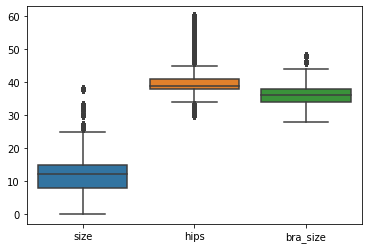

In [149]:
sb.boxplot(data=d1);

In [150]:
def zscore(k):
  mean=np.mean(d1[k])
  std=np.std(d1[k])
  for i in d1[k]:
    z=abs((i-mean)/std)
    if z>3:
      print('outlier', i ,'in columns', g)
for g in d1.columns:
  zscore(g)

outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
o

outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
o

outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
outlier 38 in columns size
o

outlier 59.0 in columns hips
outlier 57.0 in columns hips
outlier 55.0 in columns hips
outlier 56.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 in columns hips
outlier 56.0 in columns hips
outlier 58.0 in columns hips
outlier 60.0 in columns hips
outlier 55.0 in columns hips
outlier 56.0 in columns hips
outlier 55.0 in columns hips
outlier 56.0 in columns hips
outlier 57.0 in columns hips
outlier 58.0 in columns hips
outlier 58.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 55.0 in columns hips
outlier 55.0 in columns hips
outlier 59.0 in columns hips
outlier 58.0 in columns hips
outlier 55.0 in columns hips
outlier 56.0 in columns hips
outlier 58.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 55.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 i

outlier 55.0 in columns hips
outlier 56.0 in columns hips
outlier 59.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 in columns hips
outlier 55.0 in columns hips
outlier 58.0 in columns hips
outlier 56.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 in columns hips
outlier 57.0 in columns hips
outlier 55.0 in columns hips
outlier 55.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 in columns hips
outlier 58.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 in columns hips
outlier 60.0 in columns hips
outlier 59.0 in columns hips
outlier 59.0 in columns hips
outlier 58.0 in columns hips
outlier 55.0 in columns hips
outlier 55.0 in columns hips
outlier 60.0 in columns hips
outlier 57.0 in columns hips
outlier 60.0 in columns hips
outlier 59.0 in columns hips
outlier 58.0 in columns hips
outlier 55.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 i

outlier 55.0 in columns hips
outlier 60.0 in columns hips
outlier 59.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 in columns hips
outlier 59.0 in columns hips
outlier 57.0 in columns hips
outlier 55.0 in columns hips
outlier 58.0 in columns hips
outlier 58.0 in columns hips
outlier 60.0 in columns hips
outlier 55.0 in columns hips
outlier 55.0 in columns hips
outlier 60.0 in columns hips
outlier 58.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 55.0 in columns hips
outlier 58.0 in columns hips
outlier 55.0 in columns hips
outlier 55.0 in columns hips
outlier 55.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 58.0 in columns hips
outlier 58.0 in columns hips
outlier 60.0 in columns hips
outlier 55.0 in columns hips
outlier 59.0 in columns hips
outlier 56.0 in columns hips
outlier 55.0 in columns hips
outlier 58.0 in columns hips
outlier 55.0 in columns hips
outlier 60.0 in columns hips
outlier 55.0 i

outlier 60.0 in columns hips
outlier 55.0 in columns hips
outlier 56.0 in columns hips
outlier 55.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 in columns hips
outlier 58.0 in columns hips
outlier 60.0 in columns hips
outlier 57.0 in columns hips
outlier 56.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 in columns hips
outlier 55.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 56.0 in columns hips
outlier 56.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 60.0 in columns hips
outlier 55.0 in columns hips
outlier 55.0 in columns hips
outlier 56.0 in columns hips
outlier 55.0 in columns hips
outlier 58.0 in columns hips
outlier 55.0 in columns hips
outlier 55.0 in columns hips
outlier 57.0 in columns hips
outlier 60.0 in columns hips
outlier 58.0 in columns hips
outlier 57.0 i

outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46

outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 48.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46.0 in columns bra_size
outlier 46

In [151]:
#filtering the outliers
filter=[]
for j in d1.columns:
    pos=-1 # to start from 0
    mean=np.mean(d1[j])
    std=np.std(d1[j])
    for i in d1[j]:
        pos=pos+1
        score=abs((i-mean)/std)
        if score>3:
            filter.append(pos)

In [152]:
filter

[107,
 129,
 152,
 210,
 216,
 219,
 1072,
 1097,
 1098,
 1125,
 1135,
 1203,
 1237,
 1259,
 1260,
 1274,
 1281,
 1312,
 1352,
 1370,
 1372,
 1428,
 1753,
 1827,
 1830,
 1855,
 1937,
 1948,
 1954,
 1980,
 1983,
 1985,
 1992,
 1997,
 1998,
 2025,
 2031,
 2036,
 2054,
 2060,
 2063,
 2073,
 2098,
 2395,
 2482,
 3235,
 3377,
 3462,
 3493,
 3501,
 3511,
 3522,
 3524,
 3553,
 3563,
 4825,
 4833,
 4839,
 4866,
 4874,
 4878,
 4905,
 4910,
 4948,
 4973,
 5017,
 5019,
 5039,
 5043,
 5049,
 5059,
 5080,
 5098,
 5122,
 5403,
 5444,
 5453,
 5478,
 5863,
 5925,
 5930,
 5931,
 5939,
 6079,
 6080,
 6094,
 6114,
 6130,
 6131,
 6199,
 6237,
 6241,
 6260,
 6262,
 6280,
 6313,
 6358,
 6393,
 6394,
 6395,
 6396,
 6397,
 6401,
 6404,
 6410,
 6414,
 6421,
 6438,
 6443,
 6445,
 6452,
 6462,
 6467,
 6477,
 6492,
 6540,
 6576,
 6582,
 6609,
 6641,
 6651,
 6653,
 6655,
 6658,
 6666,
 6668,
 6677,
 6686,
 6687,
 6689,
 6696,
 6702,
 7894,
 7896,
 7913,
 7920,
 7926,
 7931,
 7969,
 7978,
 7996,
 8124,
 8149,
 8164

In [153]:
len(filter)

4036

In [154]:
# append the outliers
df=mod1.iloc[filter,:]

In [155]:
d1.shape

(82790, 3)

In [156]:
# drop the outliers

In [157]:
mod1=mod.drop(filter)



In [158]:
mod.shape,mod1.shape

((82790, 14), (79729, 14))

# handling the duplicates



In [159]:
mod2=mod1.duplicated()
mod2.sum()

364

In [160]:
mod1=mod1.drop_duplicates()


In [161]:
mod2=mod1.duplicated()
mod2.sum()

0

In [162]:
mod1

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,5ft 6in,Emily,just right,small,991571,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN
2,123373,7,2.0,b,NaN,32.0,new,5ft 7in,Ugggh,slightly long,small,395665,NaN,NaN
3,123373,21,5.0,dd/e,NaN,NaN,new,NaN,alexmeyer626,just right,fit,875643,NaN,NaN
4,123373,18,5.0,b,NaN,36.0,new,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,NaN,36.0,outerwear,5ft 8in,Jennifer,just right,fit,727820,Cute jacket!,Cute jacket!
82786,807722,12,5.0,ddd/f,NaN,34.0,outerwear,5ft 5in,Kelli,slightly long,small,197040,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,12,5.0,dddd/g,36.0,32.0,outerwear,5ft 4in,elacount,just right,fit,102493,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,12,4.0,NaN,NaN,NaN,outerwear,5ft 3in,jennaklinner,just right,fit,756491,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [163]:
mod1.to_json('mod_clean_data_json')

In [164]:
m=pd.read_json('mod_clean_data_json')
m

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,5ft 6in,Emily,just right,small,991571,None,None
1,123373,13,3.0,b,30.0,36.0,new,5ft 2in,sydneybraden2001,just right,small,587883,None,None
2,123373,7,2.0,b,NaN,32.0,new,5ft 7in,Ugggh,slightly long,small,395665,None,None
3,123373,21,5.0,dd/e,NaN,NaN,new,None,alexmeyer626,just right,fit,875643,None,None
4,123373,18,5.0,b,NaN,36.0,new,5ft 2in,dberrones1,slightly long,small,944840,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,NaN,36.0,outerwear,5ft 8in,Jennifer,just right,fit,727820,Cute jacket!,Cute jacket!
82786,807722,12,5.0,ddd/f,NaN,34.0,outerwear,5ft 5in,Kelli,slightly long,small,197040,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,12,5.0,dddd/g,36.0,32.0,outerwear,5ft 4in,elacount,just right,fit,102493,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,12,4.0,None,NaN,NaN,outerwear,5ft 3in,jennaklinner,just right,fit,756491,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...
